<a href="https://colab.research.google.com/github/KUDUPUDIMOUNIKA/Glaucomo_Detection/blob/master/GlaucomoDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
current_dir = os.getcwd()
print(current_dir)

/content


# DRISTHI
The dataset comprises of 101 retinal fundus images with 31 normal images and 70 glaucomatous images acquired using a retinal fundus camera. The ground truth for comparison of implemented approaches comprises of the ‘normal/abnormal’ labels and soft segmented maps of ‘disc/cup’ generated by the researchers of the IIIT Hyderabad in alliance with Aravind eye hospital in Madurai, India. It also includes a .txt file for each retinal image comprising of CDR values, which is a significant diagnostic parameter for glaucoma. Further, the images in the data repository are gathered from people of varying age groups visiting the hospital, with images acquired under varying brightness and contrast. Link to dataset: (https://cvit.iiit.ac.in/projects/mip/drishti-gs/mip-dataset2/Home.php)

In [ ]:
dristhi_dir = current_dir + '/content/drive/MyDrive/datasets/Dristhi'
train_glaucoma_dir =  "/content/drive/MyDrive/datasets/Dristhi/Training/Training/Images/GLAUCOMA"
train_normal_dir =  "/content/drive/MyDrive/datasets/Dristhi/Training/Training/Images/NORMAL"
test_glaucoma_dir =  "/content/drive/MyDrive/datasets/Dristhi/Test/Test/Images/glaucoma"
test_normal_dir =  "/content/drive/MyDrive/datasets/Dristhi/Test/Test/Images/normal"
dristhi_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
dristhi_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Dristhi dataset contains :")
print(f"\t{len(dristhi_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(dristhi_normal_images)} images representing a normal eye")


Dristhi dataset contains :
	70 images representing an eye with glaucoma
	31 images representing a normal eye


Sample Dristhi glaucoma images:


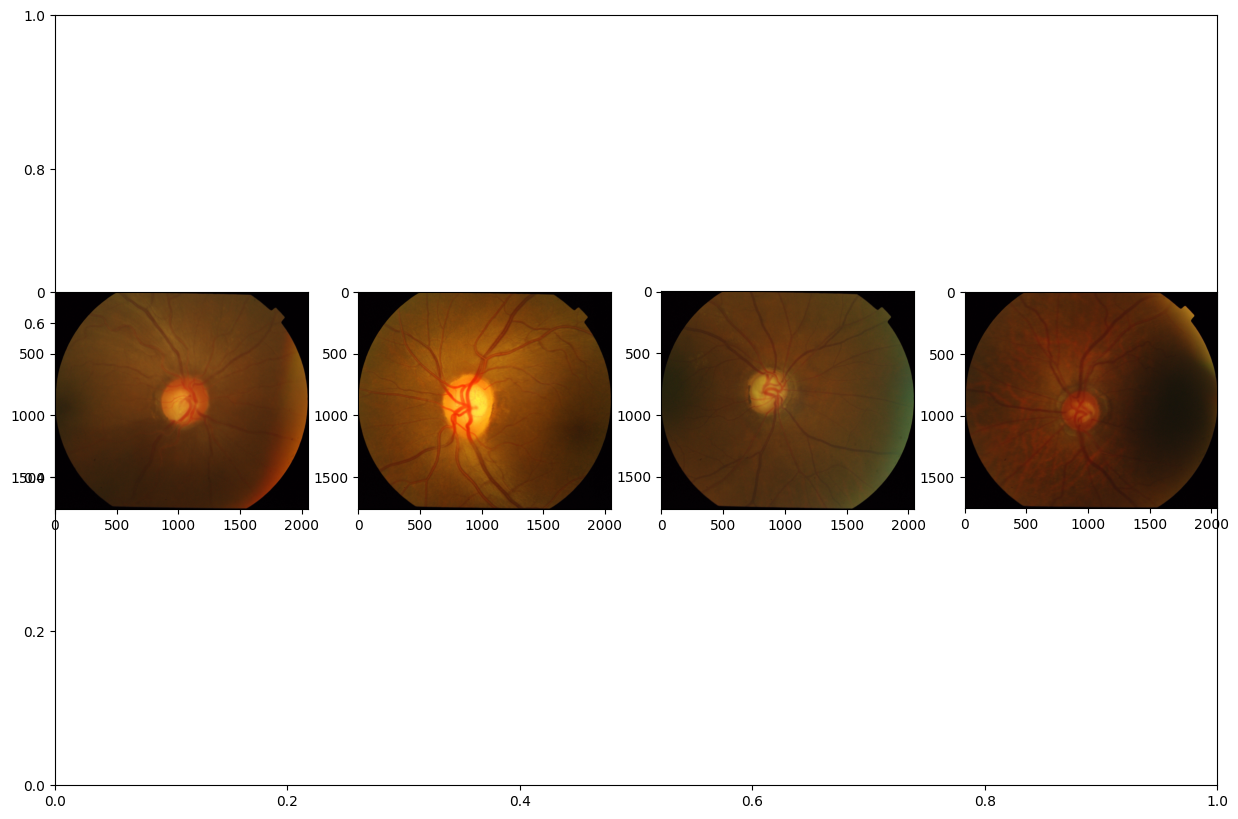

In [ ]:
print("Sample Dristhi glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, dristhi_glaucoma_images[i - 1])}"))
plt.show()


Sample Dristhi normal images:


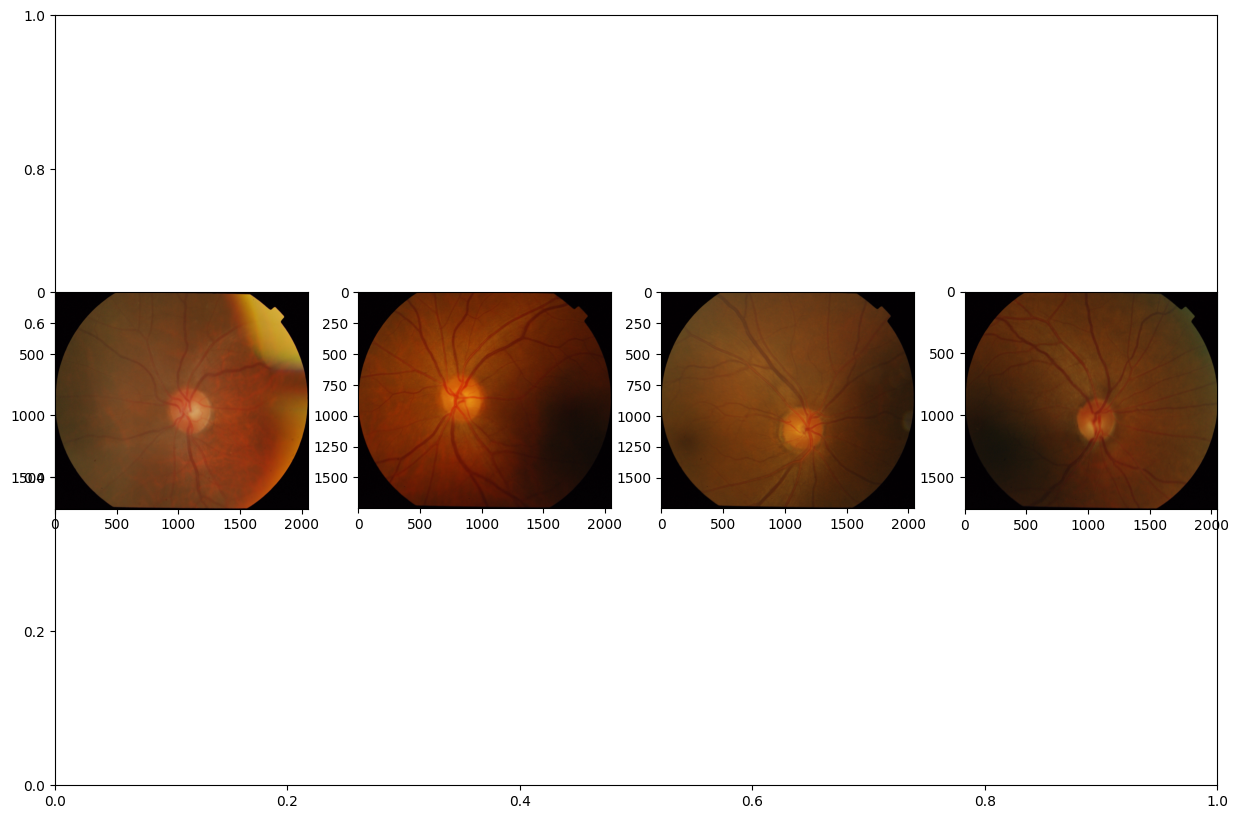

In [ ]:
print("\nSample Dristhi normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, dristhi_normal_images[i - 1])}"))
plt.show()


### Rim-One
The RIM-ONE DL image dataset consists of 313 retinographies from normal subjects and 172 retinographies from patients with glaucoma. These images were captured in three Spanish hospitals: Hospital Universitario de Canarias (HUC), in Tenerife, Hospital Universitario Miguel Servet (HUMS), in Zaragoza, and Hospital Clínico Universitario San Carlos (HCSC), in Madrid.

This dataset has been divided into training and test sets, with two variants:



* Partitioned randomly: the training and
  test sets are built randomly from all the images of the dataset.
* Partitioned by hospital: the images  
  taken in the HUC are used for the training set, while the images taken in the HUMS and HCSC are used for testing.




In [ ]:
rimOne_dir = current_dir + '/drive/MyDrive/datasets/RIM-ONE/partitioned_randomly/'
train_glaucoma_dir = rimOne_dir + "training_set/glaucoma"
train_normal_dir = rimOne_dir + "training_set/normal"
test_glaucoma_dir = rimOne_dir + "test_set/glaucoma"
test_normal_dir = rimOne_dir + "test_set/normal"
rimOne_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
rimOne_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)


In [ ]:
# Look at the number of samples in each dataset
print("Rim One dataset contains :")
print(f"\t{len(rimOne_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(rimOne_normal_images)} images representing a normal eye")

Rim One dataset contains :
	172 images representing an eye with glaucoma
	313 images representing a normal eye


Sample Rim-One glaucoma images:


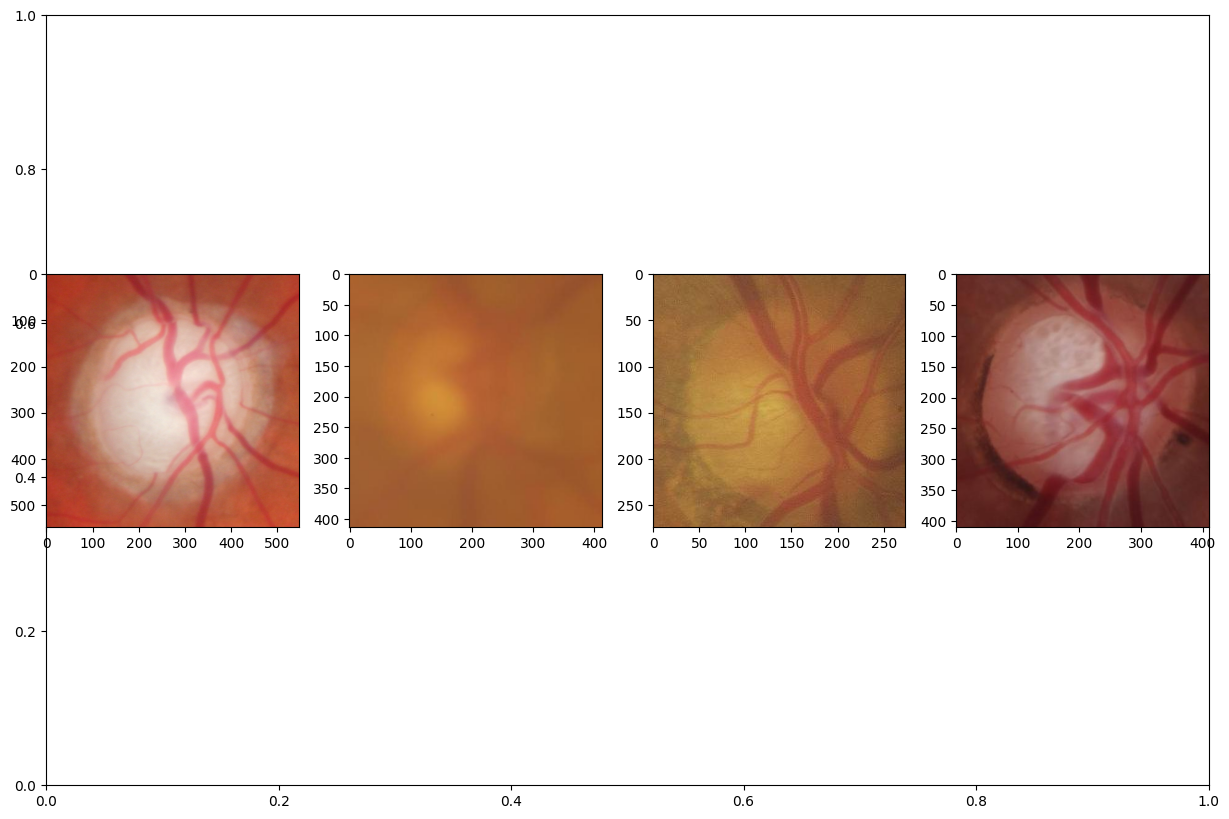


Sample Rim-One normal images:


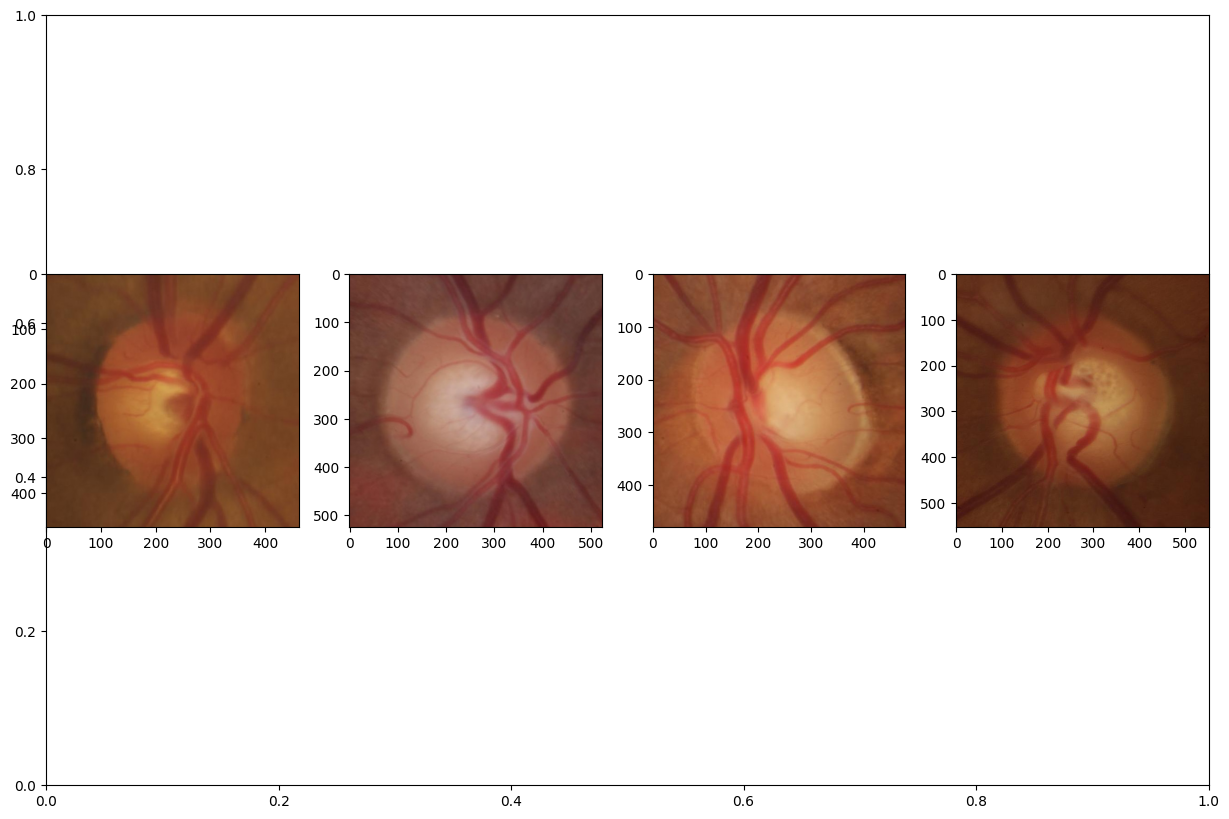

In [ ]:
print("Sample Rim-One glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, rimOne_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Rim-One normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, rimOne_normal_images[i - 1])}"))
plt.show()

# ACRIMA dataset

*   Country: Spain
*   No. of patients: unknown
*   No. of images: 705
*   Diseases present: Glaucoma and healthy
    eyes
*   Instrument used: TRC retina camera (Topcon, Japan)
*   Image format: JPEG



ACRIMA database is composed by 705 fundus images (396 glaucomatous and 309 normal images). They were collected at the FISABIO Oftalmología Médica in Valencia, Spain, from glaucomatous and normal patients with their previous consent and in accordance with the ethical standards laid down in the 1964 Declaration of Helsinki. All images from ACRIMA database were annotated by glaucoma experts with several years of experience. They were cropped around the optic disc and renamed.

The image name has the following structure: First, the name starts with the two letters "Im", followed by an image number composed by three digits (starting from 001 until 705), followed by the label (this label is "g" if the image is pathological and "_" if the image is normal). Finally, all image names have the database name, "ACRIMA", at the end of their names. For example, a name for a glaucomatous image is "Im686_g_ACRIMA" and "Im001_ACRIMA" for a normal image.

In [ ]:
acrima_dir = current_dir + "/drive/MyDrive/datasets/ACRIMA/"
glaucoma_dir = acrima_dir + "/glaucoma"
normal_dir = acrima_dir + "/normal"

normal_images = os.listdir(normal_dir)
glaucoma_images = os.listdir(glaucoma_dir)

In [ ]:
print("Acrima dataset contains : ")
print(f"\t{len(glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(normal_images)} images representing a normal eye")

Acrima dataset contains : 
	396 images representing an eye with glaucoma
	309 images representing a normal eye


Sample glaucoma images:


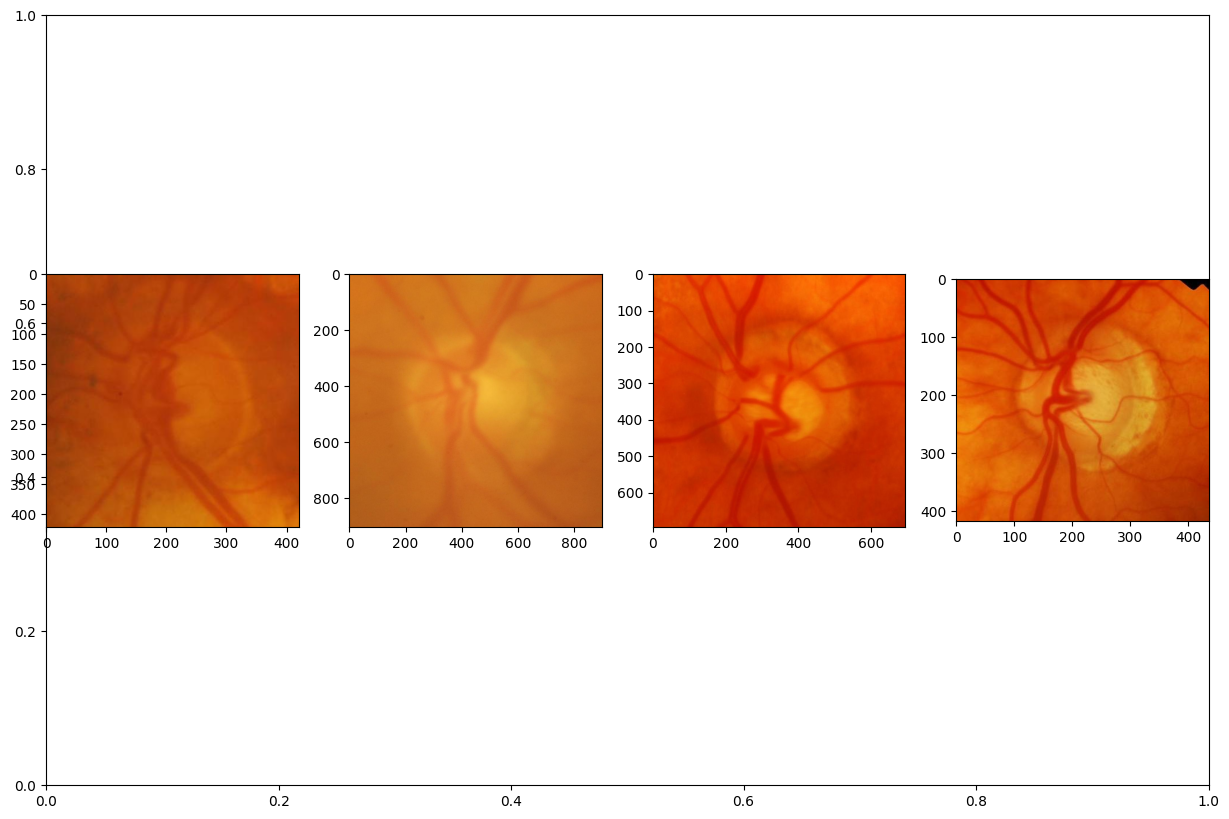

In [ ]:
print("Sample glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(glaucoma_dir, glaucoma_images[i - 1])}"))
plt.show()


Sample normal images:


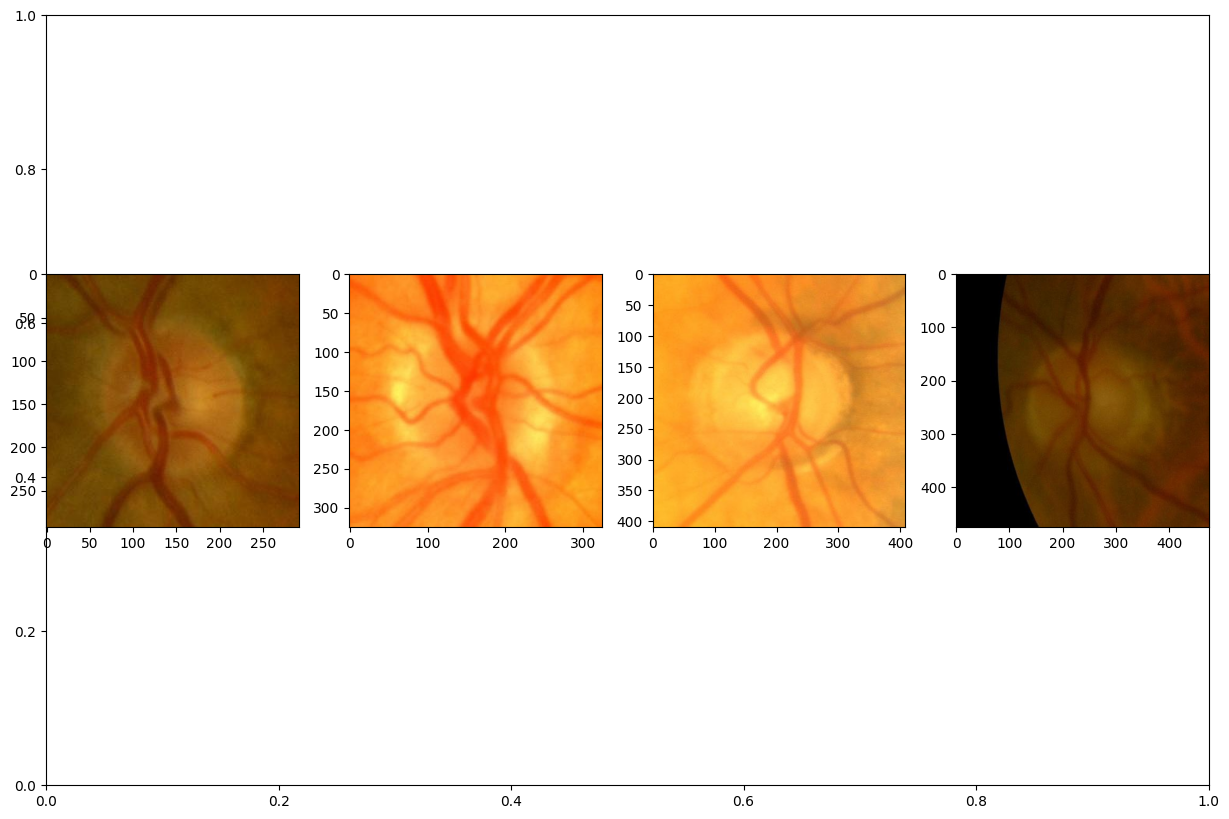

In [ ]:
print("\nSample normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(normal_dir, normal_images[i - 1])}"))
plt.show()

Combining datasets

In [ ]:
import os
import shutil

# Create a new folder for combined data
combined_dir = "/content/combine"
os.makedirs(combined_dir, exist_ok=True)

# Define paths for glaucoma images
g_paths = [
    "/content/drive/MyDrive/datasets/ACRIMA/glaucoma",
    "/content/drive/MyDrive/datasets/RIM-ONE/partitioned_randomly/training_set/glaucoma",
    "/content/drive/MyDrive/datasets/RIM-ONE/partitioned_randomly/test_set/glaucoma",
    "/content/drive/MyDrive/datasets/Dristhi/Training/Images/GLAUCOMA",
    "/content/drive/MyDrive/datasets/Dristhi/Test/Images/glaucoma",
]

# Create destination folder for glaucoma
g_dest = os.path.join(combined_dir, "glaucoma")
os.makedirs(g_dest, exist_ok=True)

# Copy files
for src in g_paths:
    if os.path.exists(src):  # Ensure the source path exists
        for file in os.listdir(src):
            src_file = os.path.join(src, file)
            dest_file = os.path.join(g_dest, file)
            if os.path.isfile(src_file):  # Only copy files, not directories
                shutil.copy2(src_file, dest_file)

print("Glaucoma images:", len(os.listdir(g_dest)))

##################################################

# Define paths for normal images
n_paths = [
    "/content/drive/MyDrive/datasets/ACRIMA/Database/normal",
    "/content/drive/MyDrive/datasets/RIM-ONE/partitioned_randomly/training_set/normal",
    "/content/drive/MyDrive/datasets/RIM-ONE/partitioned_randomly/test_set/normal",
    "/content/drive/MyDrive/datasets/Dristhi/Training/Images/NORMAL",
    "/content/drive/MyDrive/datasets/Dristhi/Test/Images/normal",
]

# Create destination folder for normal images
n_dest = os.path.join(combined_dir, "normal")
os.makedirs(n_dest, exist_ok=True)

# Copy files
for src in n_paths:
    if os.path.exists(src):  # Ensure the source path exists
        for file in os.listdir(src):
            src_file = os.path.join(src, file)
            dest_file = os.path.join(n_dest, file)
            if os.path.isfile(src_file):  # Only copy files, not directories
                shutil.copy2(src_file, dest_file)

print("Normal images:", len(os.listdir(n_dest)))


Glaucoma images: 568
Normal images: 313


Total images: 0
Total number of classes: 2
Total glaucoma images: 568
Total normal images: 313


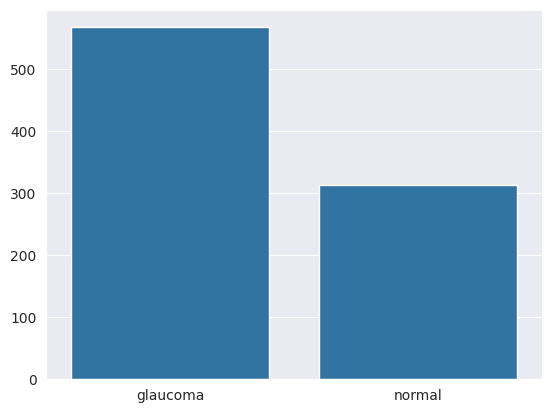

In [ ]:
from pathlib import Path
base_dir = '/content/drive/MyDrive/datasets/combine'
base_dir = Path(base_dir)

glaucoma = [fn for fn in os.listdir(f'/content/combine/glaucoma/')]
normal = [fn for fn in os.listdir(f'/content/combine/normal')]
data=[glaucoma,normal]
dataset_classes =['glaucoma','normal']

image_count = len(list(base_dir.glob('*/*.jpg')))+len(list(base_dir.glob('*/*.png')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(dataset_classes)}')
count = 0
data_count = []
for x in dataset_classes:
  print(f'Total {x} images: {len(data[count])}')
  data_count.append(len(data[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=dataset_classes, y=data_count)
plt.show()

In [ ]:
print(568+313)

881


Spliiting Ratio of Dataset 80:10:10 (Train:Test:Validation)

In [ ]:
!pip install split-folders
import splitfolders #to split dataset
import pathlib
base_ds = '/content/combine'
base_ds = pathlib.Path(base_ds)
img_height=256
img_width=256
batch_size=32
splitfolders.ratio(base_ds, output='images', seed=1321, ratio=(.8,.1,.1), group_prefix=None)


Copying files: 881 files [00:01, 518.90 files/s]


Data augmentation done using Image Data Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
shear_range = 0.15,
zoom_range = 0.15,
horizontal_flip = True)
train_ds = datagen.flow_from_directory(
    'images/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

val_ds = datagen.flow_from_directory(
    'images/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'images/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)



Found 704 images belonging to 2 classes.
Found 87 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


# New Section